In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, cohen_kappa_score, make_scorer
import xgboost as xgb
from sklearn import tree


import os

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
seed = 42

In [ ]:
train_path = r'..\data\child-mind-institute-problematic-internet-use\train.csv'
test_path = r'..\data\child-mind-institute-problematic-internet-use\test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

diff = set(set(train_df.columns) - set(test_df.columns))
ls = list(diff)
ls.remove('sii')

: 

In [ ]:
train_df_processed = train_df.copy().dropna(subset=['sii'])
train_df_processed = train_df_processed.drop(columns=ls)
train_df_processed_num = train_df_processed.select_dtypes('number').drop(columns='sii')
train_df_processed_obj = train_df_processed.select_dtypes('object').drop(columns='id')
train_df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 60 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      2736 non-null   object 
 1   Basic_Demos-Enroll_Season               2736 non-null   object 
 2   Basic_Demos-Age                         2736 non-null   int64  
 3   Basic_Demos-Sex                         2736 non-null   int64  
 4   CGAS-Season                             2342 non-null   object 
 5   CGAS-CGAS_Score                         2342 non-null   float64
 6   Physical-Season                         2595 non-null   object 
 7   Physical-BMI                            2527 non-null   float64
 8   Physical-Height                         2530 non-null   float64
 9   Physical-Weight                         2572 non-null   float64
 10  Physical-Waist_Circumference            483 non-null    float64
 

: 

In [ ]:
train_df_processed[train_df_processed_num.columns] = train_df_processed_num.fillna(train_df_processed_num.mean())

train_df_processed_obj = train_df_processed_obj.astype('category')
for i in train_df_processed_obj.columns:
    train_df_processed_obj[i] = train_df_processed_obj[i].cat.set_categories(
        new_categories=['Spring', 'Summer', 'Fall', 'Winter'], ordered=True
    )
train_df_processed_obj = train_df_processed_obj.fillna(train_df_processed_obj.agg(lambda x: x.mode().values[0]))
for i in train_df_processed_obj.columns:
    train_df_processed_obj[i] = train_df_processed_obj[i].cat.codes

train_df_processed[train_df_processed_obj.columns] = train_df_processed_obj

: 

In [ ]:
train_df_processed.info()

: 

In [ ]:
train_df_processed.head()

: 

In [ ]:
# Data ready, train test spliting
X = train_df_processed.drop(columns=['id', 'sii']).to_numpy()
y = train_df_processed['sii'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=seed)

train_df_processed = train_df_processed.drop(columns=['id'])

: 

In [ ]:
# clf1 = DecisionTreeClassifier(random_state=seed)
# clf1.fit(X_train, y_train)
# y_pred = clf1.predict(X_train)
# target_names = ['None', 'Mild', 'Moderate', 'Severe']
# print('Training Quadratic Weighted Kappa: ', cohen_kappa_score(y_train, y_pred, weights='quadratic'))
# print('Training report:\n', classification_report(y_train, y_pred, target_names=target_names))
# print('='*50)

# y_pred = clf1.predict(X_test)
# target_names = ['None', 'Mild', 'Moderate', 'Severe']
# print('Testing Quadratic Weighted Kappa: ', cohen_kappa_score(y_test, y_pred, weights='quadratic'))
# print('Testing report:\n', classification_report(y_test, y_pred, target_names=target_names))
# print('='*50)

# my_scorer = make_scorer(myScoring)
# cv_ls = cross_val_score(clf1, X, y, cv=10, scoring=my_scorer)
# print('Cross_val_score on Quadratic Weighted Kappa:\n', cv_ls, '\n Mean: ', cv_ls.mean())

: 

In [ ]:
# clf2 = RandomForestClassifier(random_state=seed)
# clf2.fit(X_train, y_train)
# y_pred = clf2.predict(X_train)
# target_names = ['None', 'Mild', 'Moderate', 'Severe']
# print('Training Quadratic Weighted Kappa: ', cohen_kappa_score(y_train, y_pred, weights='quadratic'))
# print('Training report:\n', classification_report(y_train, y_pred, target_names=target_names))
# print('='*50)

# y_pred = clf2.predict(X_test)
# target_names = ['None', 'Mild', 'Moderate', 'Severe']
# print('Testing Quadratic Weighted Kappa: ', cohen_kappa_score(y_test, y_pred, weights='quadratic'))
# print('Testing report:\n', classification_report(y_test, y_pred, target_names=target_names))
# print('='*50)

# cv_ls = cross_val_score(clf2, X, y, cv=10, scoring=my_scorer)
# print('Cross_val_score on Quadratic Weighted Kappa:\n', cv_ls, '\n Mean: ', cv_ls.mean())

: 

In [ ]:
# clf3 = xgb.XGBRFClassifier(random_state=42)
# clf3.fit(X_train, y_train)
# y_pred = clf3.predict(X_train)
# target_names = ['None', 'Mild', 'Moderate', 'Severe']
# print('Training Quadratic Weighted Kappa: ', cohen_kappa_score(y_train, y_pred, weights='quadratic'))
# print('Training report:\n', classification_report(y_train, y_pred, target_names=target_names))
# print('='*50)

# y_pred = clf3.predict(X_test)
# target_names = ['None', 'Mild', 'Moderate', 'Severe']
# print('Testing Quadratic Weighted Kappa: ', cohen_kappa_score(y_test, y_pred, weights='quadratic'))
# print('Testing report:\n', classification_report(y_test, y_pred, target_names=target_names))
# print('='*50)

# cv_ls = cross_val_score(clf3, X, y, cv=10, scoring=my_scorer)
# print('Cross_val_score on Quadratic Weighted Kappa:\n', cv_ls, '\n Mean: ', cv_ls.mean())

: 

ended, result at:  ../eval/test_v2_0


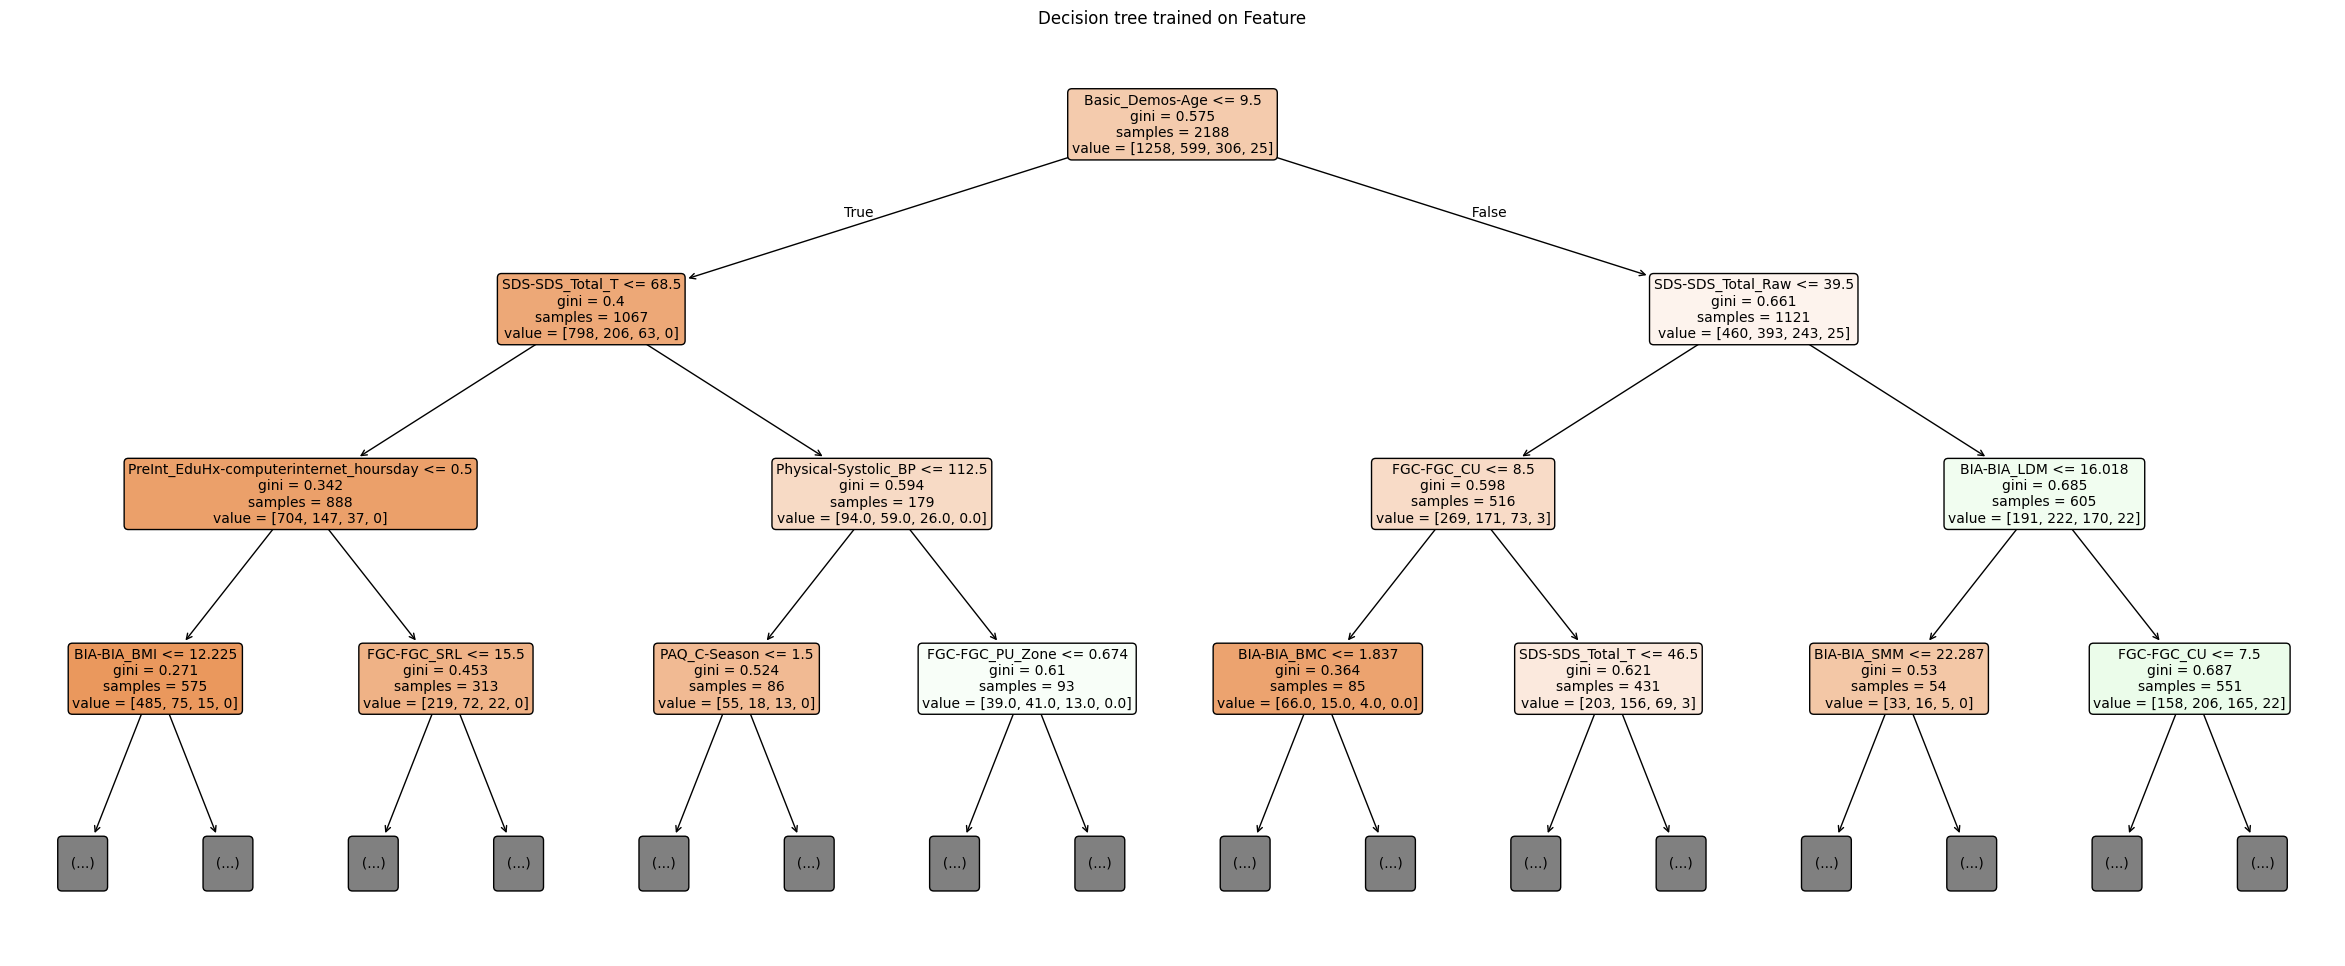

: 

In [ ]:
import eval

e = eval.eval(train_df_processed, '../eval/test_v2_0', 42)
e.save()